<a id="0"></a> <br>

# Table of Contents  
1. [Overview of the Project](#1)  
   - [a. Business Problem](#2)  
   - [b. Analytical Methodology](#2)  
2. [Data Cleaning and Exploration](#4)  
   - [a. Data Exploration](#5)  
   - [b. Data Cleaning](#6)  
   - [c. Feature Selection](#7)  
3. [Conclusion](#8)  


<a id="1"></a> 

## 1. Overview of the Project

<a id="2"></a> 
### a. Business Problem

Home Credit focuses on delivering greater access to financial services through financial inclusion efforts across markets, including the unbanked. With insufficient or non-existent credit history, it is hard for them to receive loans from financial institutions. However, in order to guarantee a positive and safe borrowing experience, Home Credit needs to predict their ability of loan repayments with data.

The purpose of this project is to create a predictive model on clients’ ability of loan repayments.

<a id="3"></a> 
### b. Analytical Methodology

Default risk prediction will be generated using a supervised machine learning classification model. Historical loan application data will be split into two sets, 80% for training and 20% for test. I will build the model based on the trained dataset and test its performance on the test set. The model will analyze factors like applicant demographics, credit history, past loan performance and repayment behavior to predict the chances of clients’ default on loans.

<a id="4"></a> 
## 2. Data Cleaning and Exploration

In this section, we will prepare the data for modeling by performing the following steps:

- Data Exploration: understand features & dataset
- Data Cleaning: remove duplicates, multicollinearity, and address missing values/inconsistencies
- Feature Selection: conduct correlation analysis to find strong predictors 

<a id="5"></a> 
### a. Data Exploration

In [726]:
# import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# suppress warnings
import warnings
warnings.filterwarnings('ignore')

# define the function for reducing memory usage when importing data
def reduce_memory_usage(df):
  
    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))
    
    for col in df.columns:
        col_type = df[col].dtype
        
        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    
    return df

# Suppress Pandas output display
pd.set_option('display.max_rows', 10)  # Show only 10 rows
pd.set_option('display.max_columns', 10)  # Show only 10 columns
pd.set_option('display.width', 1000)  # Increase width for better readability
pd.set_option('display.max_colwidth', 100)  # Limit column width

In [727]:
# import data
test = reduce_memory_usage(pd.read_csv("/Users/linhdo/Documents/University/University of Utah/Coursework/Spring 2025/Career Capstone/home-credit-default-risk/application_test.csv"))

train = reduce_memory_usage(pd.read_csv("/Users/linhdo/Documents/University/University of Utah/Coursework/Spring 2025/Career Capstone/home-credit-default-risk/application_train.csv"))

bureau_balance = reduce_memory_usage(pd.read_csv("/Users/linhdo/Documents/University/University of Utah/Coursework/Spring 2025/Career Capstone/home-credit-default-risk/bureau_balance.csv"))

bureau = reduce_memory_usage(pd.read_csv("/Users/linhdo/Documents/University/University of Utah/Coursework/Spring 2025/Career Capstone/home-credit-default-risk/bureau.csv"))

credit_card_balance = reduce_memory_usage(pd.read_csv("/Users/linhdo/Documents/University/University of Utah/Coursework/Spring 2025/Career Capstone/home-credit-default-risk/credit_card_balance.csv"))

installments_payments = reduce_memory_usage(pd.read_csv("/Users/linhdo/Documents/University/University of Utah/Coursework/Spring 2025/Career Capstone/home-credit-default-risk/installments_payments.csv"))

POS_CASH_balance = reduce_memory_usage(pd.read_csv("/Users/linhdo/Documents/University/University of Utah/Coursework/Spring 2025/Career Capstone/home-credit-default-risk/POS_CASH_balance.csv"))

previous_application = reduce_memory_usage(pd.read_csv("/Users/linhdo/Documents/University/University of Utah/Coursework/Spring 2025/Career Capstone/home-credit-default-risk/previous_application.csv"))

In [728]:
train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,...,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,...,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,...,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,...,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,...,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,...,0.0,0.0,0.0,0.0,0.0


In [729]:
train.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,...,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,...,265992.000000,265992.000000,265992.0,265992.0,265992.0
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990259e+05,...,0.000000,0.000000,NaN,NaN,NaN
std,102790.175348,0.272419,0.722121,2.371759e+05,4.024795e+05,...,0.110718,0.204712,0.0,NaN,0.0
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,...,0.000000,0.000000,0.0,0.0,0.0
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,...,0.000000,0.000000,0.0,0.0,0.0
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,...,0.000000,0.000000,0.0,0.0,1.0
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,...,0.000000,0.000000,0.0,0.0,3.0
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,...,9.000000,8.000000,27.0,261.0,25.0


<a id="6"></a> 
### b. Data Cleaning

#### Remove duplicates

In [732]:
# remove duplicates
train = train.drop_duplicates()
train.info()

#### Remove multicollinearity
- Remove highly-correlated numerical variables with greater than 0.8 correlation score using correlation matrix
- Remove highly-correlated categorical variables and other irrelevant columns using domain knowledge

I remove the variables related to the apartments since it's highly-correlated with each other and has more than 50% missing values. Other irrelevant information I believe are not strong predictors are:
- Who accompanied the client to apply for the loan
- The day and hour the client applied for the loan
- Whether client's permanent address match work address or not
- Whether the client provided work/home phone phone or not
- How many days before application did the client change phone

In [734]:
# Drop highly-correlated numerical variables
# Step 1: Select only numeric columns
numeric_columns = train.select_dtypes(include=['number']).columns

# Step 2: Compute the correlation matrix for numeric columns
correlation_matrix = train[numeric_columns].corr()

# Step 3: Identify pairs of features with correlation above a threshold
threshold = 0.8
to_drop = []  # List to store columns to drop

# Step 4: Loop through the correlation matrix to find highly correlated pairs
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            colname = correlation_matrix.columns[i]
            if colname not in to_drop:
                to_drop.append(colname)

# Step 5: Drop one column from each highly correlated pair
train_cleaned = train.drop(columns=to_drop)

# Output the cleaned data and the dropped columns
print("Dropped columns:", to_drop)
print("Cleaned dataset shape:", train_cleaned.shape)

In [735]:
# Drop highly-correlated categorical variables and other irrelevant columns using domain knowledge
# List of columns to remove
columns_to_remove = [
    'NAME_TYPE_SUITE', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_PHONE', 'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START', 
    'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'APARTMENTS_AVG', 'YEARS_BUILD_AVG', 
    'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'COMMONAREA_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG', 
    'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG', 
    'NONLIVINGAREA_AVG', 'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'COMMONAREA_MODE', 'ELEVATORS_MODE', 
    'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE', 
    'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI', 'COMMONAREA_MEDI', 
    'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'FLOORSMAX_MEDI', 'FLOORSMIN_MEDI', 'LANDAREA_MEDI', 'LIVINGAPARTMENTS_MEDI', 
    'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI', 'NONLIVINGAREA_MEDI', 'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE', 'TOTALAREA_MODE', 
    'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE', 'DAYS_LAST_PHONE_CHANGE'
]

# Check which columns are present in the train_cleaned dataset
columns_present = [col for col in columns_to_remove if col in train_cleaned.columns]

# Drop only the columns that exist in the dataset
train_cleaned = train_cleaned.drop(columns=columns_present)

# Check the first few rows to confirm the columns are removed
train_cleaned.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,...,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,...,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,...,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,...,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,...,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,...,0.0,0.0,0.0,0.0,0.0


#### Handle missing values and inconsistencies

In [737]:
# investigate the cleaned data
train_cleaned.info()

In [738]:
# Check the percentage of missing values per column
missing_percentage = (train_cleaned.isna().mean()) * 100
print(missing_percentage[missing_percentage > 0])


There are variables with high percentage of missing values that we need to investigate:
- OWN_CAR_AGE (66%): This might be due to failure in data collection or a proportion of clients who don't have a car  
- OCCUPATION_TYPE (31%): This might be due to failure in data collection or a proportion of unemployed clients  
- EXT_SOURCE_1 (56%): This might be due to failure in data collection or a proportion of unbanked clients - we will impute them with 0.
- EXT_SOURCE_3 (19.8%): This might be due to failure in data collection or a proportion of unbanked clients - we will impute them with 0.
- 5 columns on AMT_REQ_CREDIT_BUREAU (13%): Since the percentage of missing values are the same among 5 columns, it is structured missingness. Those missing values may represent those whose the inquiry number is 0.

For variables with low percentages of NAs value, I will replace NAs with the median.

In [740]:
# OWN_CAR_AGE
# Investigate distribution 
# Check the distribution of OWN_CAR_AGE by car ownership (if such a column exists)
train_cleaned.groupby('FLAG_OWN_CAR')['OWN_CAR_AGE'].apply(lambda x: x.isnull().mean())

# Filter customers who own a car
car_owners = train_cleaned[train_cleaned['FLAG_OWN_CAR'] == 'Y']

# Count columns with missing values in OWN_CAR_AGE for these customers
missing_values_car_owners = car_owners[car_owners['OWN_CAR_AGE'].isnull()]

# Get the number of columns with missing values
num_missing_columns = missing_values_car_owners.isnull().sum().sum()
print(f'Number of columns with missing values for customers who own a car: {num_missing_columns}')

# Remove customers who own a car but have missing 'OWN_CAR_AGE'
car_owners_cleaned = car_owners[car_owners['OWN_CAR_AGE'].notnull()]

# Update the main dataset
train_cleaned = pd.concat([
    car_owners_cleaned,  # Cleaned car owners
    train_cleaned[train_cleaned['FLAG_OWN_CAR'] == 'N']  # Non-car owners remain unchanged
])

# Replace missing values in OWN_CAR_AGE with 0
train_cleaned['OWN_CAR_AGE'].fillna(0, inplace=True)

# Drop FLAG_OWN_CAR column
train_cleaned.drop(columns=['FLAG_OWN_CAR'], inplace=True)

# Check the final dataset
train_cleaned.info()


For customers not having a car, the percentage of NAs in 'OWN_CAR_AGE' is 100%. In the meantime, the percentage for customers having a car but does not have OWN_CAR_AGE is 0.0048% (8 customers). In this case, I decide to remove those 8 variables.

In [742]:
# OCCUPATION_TYPE: Inspect whether missingness correlates with income or other employment-related features.
# Investigate NAME_INCOME_TYPE for rows with missing OCCUPATION_TYPE
missing_occupation = train_cleaned[train_cleaned['OCCUPATION_TYPE'].isnull()]

# Get the value counts of NAME_INCOME_TYPE for these rows
income_type_missing_occupation = missing_occupation['NAME_INCOME_TYPE'].value_counts()

# Display the result
print(income_type_missing_occupation)

# Display the values for NAME_INCOME_TYPE
train_cleaned['NAME_INCOME_TYPE'].value_counts()

# Display the values for OCCUPATION_TYPE
train_cleaned['OCCUPATION_TYPE'].value_counts()

# Filter the dataset for rows where NAME_INCOME_TYPE is 'Student'
student_income_type = train_cleaned[train_cleaned['NAME_INCOME_TYPE'] == 'Student']

# Display the OCCUPATION_TYPE for those rows
student_occupation_type = student_income_type['OCCUPATION_TYPE'].value_counts()

# Display the result
student_occupation_type

# Drop OCCUPATION_TYPE
train_cleaned = train_cleaned.drop(columns=['OCCUPATION_TYPE'])

It seems like the missing values in OCCUPATION_TYPE do not correlate with NAME_INCOME_TYPE. They are probably missing randomly. Since 30% of NAs is not a small number, I don't impute with mode in order to avoid introducing bias. 

However, we can see that NAME_INCOME_TYPE and AMT_INCOME_TOTAL is in the same category (occupation and income) with OCCUPATION_TYPE. Therefore, to an extent, we can try to use NAME_INCOME_TYPE & AMT_INCOME_TOTAL and see how the model works. Then based on the model result, we can decide if we need the OCCUPATION_TYPE column. In that scenario, we can impute mode within subset based on NAME_INCOME_TYPE column.

In [744]:
# EXT_SOURCE_1, EXT_SOURCE_3: replace NAs with 0
train_cleaned['EXT_SOURCE_1'].fillna(0, inplace=True)
train_cleaned['EXT_SOURCE_3'].fillna(0, inplace=True)

# Verify the replacement
print(train_cleaned[['EXT_SOURCE_1', 'EXT_SOURCE_3']].isnull().sum())

In [745]:
# AMT_REQ_CREDIT_BUREAU columns: fill NAs with 0
# List of AMT_REQ_CREDIT_BUREAU columns
amt_req_credit_columns = ['AMT_REQ_CREDIT_BUREAU_HOUR',
    'AMT_REQ_CREDIT_BUREAU_DAY', 
    'AMT_REQ_CREDIT_BUREAU_WEEK', 
    'AMT_REQ_CREDIT_BUREAU_MON', 
    'AMT_REQ_CREDIT_BUREAU_QRT', 
    'AMT_REQ_CREDIT_BUREAU_YEAR'
]

# Fill NAs with 0 
train_cleaned[amt_req_credit_columns] = train_cleaned[amt_req_credit_columns].fillna(0)

# Verify the changes
train_cleaned[amt_req_credit_columns].isnull().sum()

AMT_REQ_CREDIT_BUREAU_HOUR    0
AMT_REQ_CREDIT_BUREAU_DAY     0
AMT_REQ_CREDIT_BUREAU_WEEK    0
AMT_REQ_CREDIT_BUREAU_MON     0
AMT_REQ_CREDIT_BUREAU_QRT     0
AMT_REQ_CREDIT_BUREAU_YEAR    0
dtype: int64

In [746]:
# Filling missing values with median
# List of columns to fill missing values with their median
columns_to_fill = [
    'AMT_ANNUITY', 'EXT_SOURCE_2', 
    'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 
]

# Replace missing values with the median for each specified column
for col in columns_to_fill:
    median_value = train_cleaned[col].median()  # Calculate the median of the column
    train_cleaned[col] = train_cleaned[col].fillna(median_value)  # Fill NAs with the median

# Check the result (optional)
print(train_cleaned.head())


In [747]:
train_cleaned.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_REALTY,...,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
2,100004,0,Revolving loans,M,Y,...,0.0,0.0,0.0,0.0,0.0
6,100009,0,Cash loans,F,Y,...,0.0,0.0,1.0,1.0,2.0
7,100010,0,Cash loans,M,Y,...,0.0,0.0,0.0,0.0,0.0
13,100017,0,Cash loans,M,N,...,0.0,0.0,0.0,0.0,1.0
15,100019,0,Cash loans,M,Y,...,0.0,0.0,0.0,0.0,1.0


<a id="7"></a> 
### c. Feature Selection

Since we still have 58 columns on the cleaned dataset, I want to remove those variables which are not strong predictors. I keep those numeric variables with the correlation score of > 0.01 or < -0.01.

Finally, I will look at the statistics of columns to look for anomalies in the dataset and also look closer at the correlation between the target variable and the predictors.

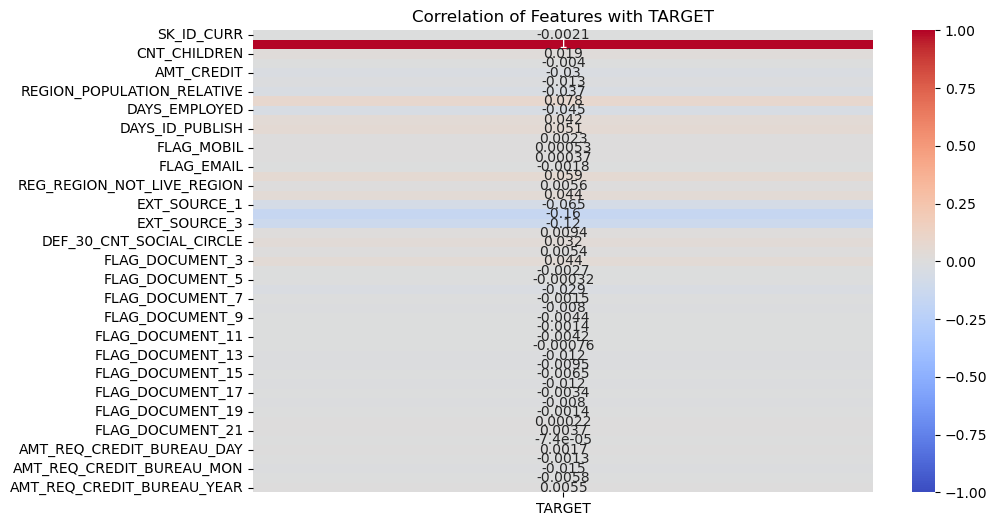

In [750]:
# Select only numeric columns
numeric_columns = train_cleaned.select_dtypes(include=['float64', 'int64', 'int8', 'int32', 'float32', 'int16', 'float16']).columns

# Calculate the correlation matrix for numeric columns
correlation_matrix = train_cleaned[numeric_columns].corr()

# Extract the correlation values with respect to 'TARGET'
target_correlation = correlation_matrix['TARGET'].sort_values(ascending=False)

# Display the correlation values
print(target_correlation)

# Visualize the correlation using a heatmap (optional)
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix[['TARGET']], annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation of Features with TARGET')
plt.show()

In [751]:
# Set correlation threshold
threshold = 0.01  

# Identify numerical columns that meet the correlation threshold
strong_corr_features = target_correlation[abs(target_correlation) >= threshold].index.tolist()

# Identify categorical columns
categorical_features = train_cleaned.select_dtypes(include=['object', 'category']).columns.tolist()

# Combine numerical and categorical features
selected_features = strong_corr_features + categorical_features

# Filter the dataset
train_filtered = train_cleaned[selected_features]

# Display the final selected features
print("Selected Features:", train_filtered.columns.tolist())


#### Exploratory Data Analysis

In [753]:
# Understand dataset
train_filtered.info()

train_filtered.describe()

,TARGET,DAYS_BIRTH,REGION_RATING_CLIENT,DAYS_ID_PUBLISH,REG_CITY_NOT_LIVE_CITY,...,REGION_POPULATION_RELATIVE,DAYS_EMPLOYED,EXT_SOURCE_1,EXT_SOURCE_3,EXT_SOURCE_2
count,307506.000000,307506.000000,307506.000000,307506.000000,307506.000000,...,307506.000000,307506.000000,307506.000000,307506.000000,3.075060e+05
mean,0.080730,-16037.022357,2.052461,-2994.186513,0.078171,...,0.000000,63816.115107,NaN,NaN,NaN
std,0.272421,4364.004626,0.509035,1509.450485,0.268441,...,0.013832,141276.666124,0.000000,0.000000,0.000000e+00
min,0.000000,-25229.000000,1.000000,-7197.000000,0.000000,...,0.000290,-17912.000000,0.000000,0.000000,5.960464e-08
25%,0.000000,-19682.000000,2.000000,-4299.000000,0.000000,...,0.010010,-2760.000000,0.000000,0.178711,3.930664e-01
50%,0.000000,-15750.000000,2.000000,-3254.000000,0.000000,...,0.018845,-1213.000000,0.000000,0.459717,5.659180e-01
75%,0.000000,-12413.000000,2.000000,-1720.000000,0.000000,...,0.028656,-289.000000,0.456299,0.636230,6.635742e-01
max,1.000000,-7489.000000,3.000000,0.000000,1.000000,...,0.072510,365243.000000,0.962891,0.895996,8.549805e-01


We remove anomalies in DAYS_EMPLOYED where values > 300000

In [755]:
# Filter the data to remove rows where DAYS_EMPLOYED > 300000
train_filtered = train_filtered[train_filtered['DAYS_EMPLOYED'] <= 300000]

# Count the unique values of DAYS_EMPLOYED
days_employed_counts = train_filtered['DAYS_EMPLOYED'].value_counts()


**Distribution of each variable**

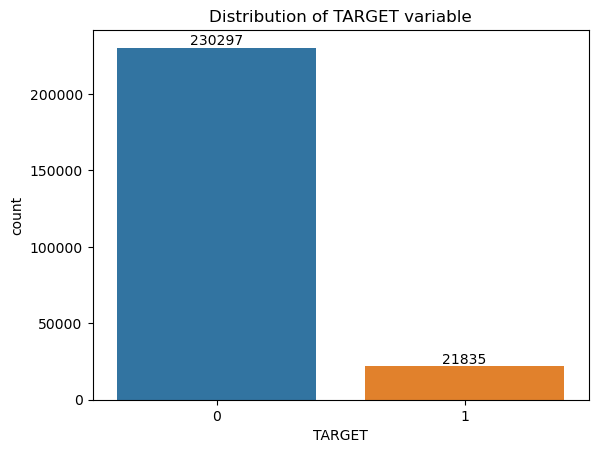

In [757]:
# Look closer at the TARGET variable
target_distribution = sns.countplot(data=train_filtered, x='TARGET')
target_distribution.bar_label(target_distribution.containers[0]) 
plt.title("Distribution of TARGET variable")
plt.show()

The TARGET variable is highly skewed, with only 9% of defaulters. This may cause bias in our classification model later on.

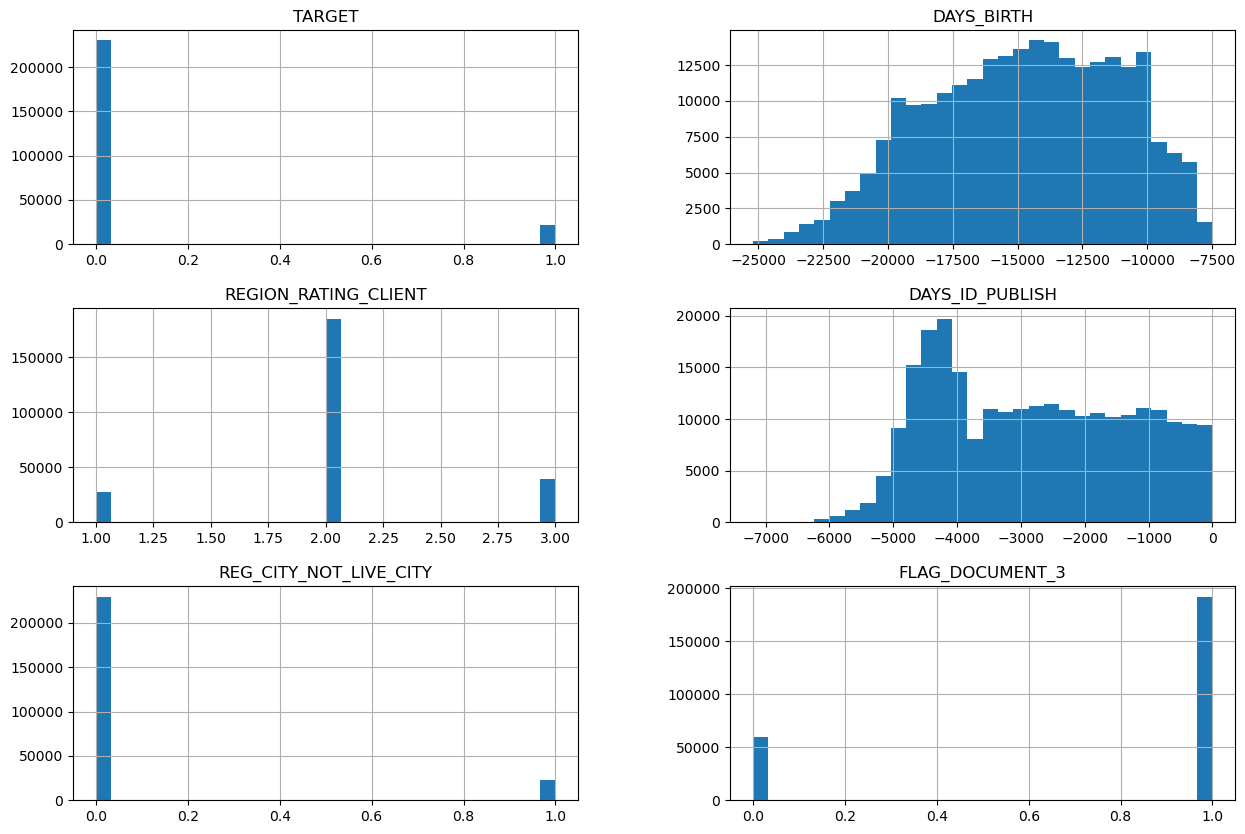

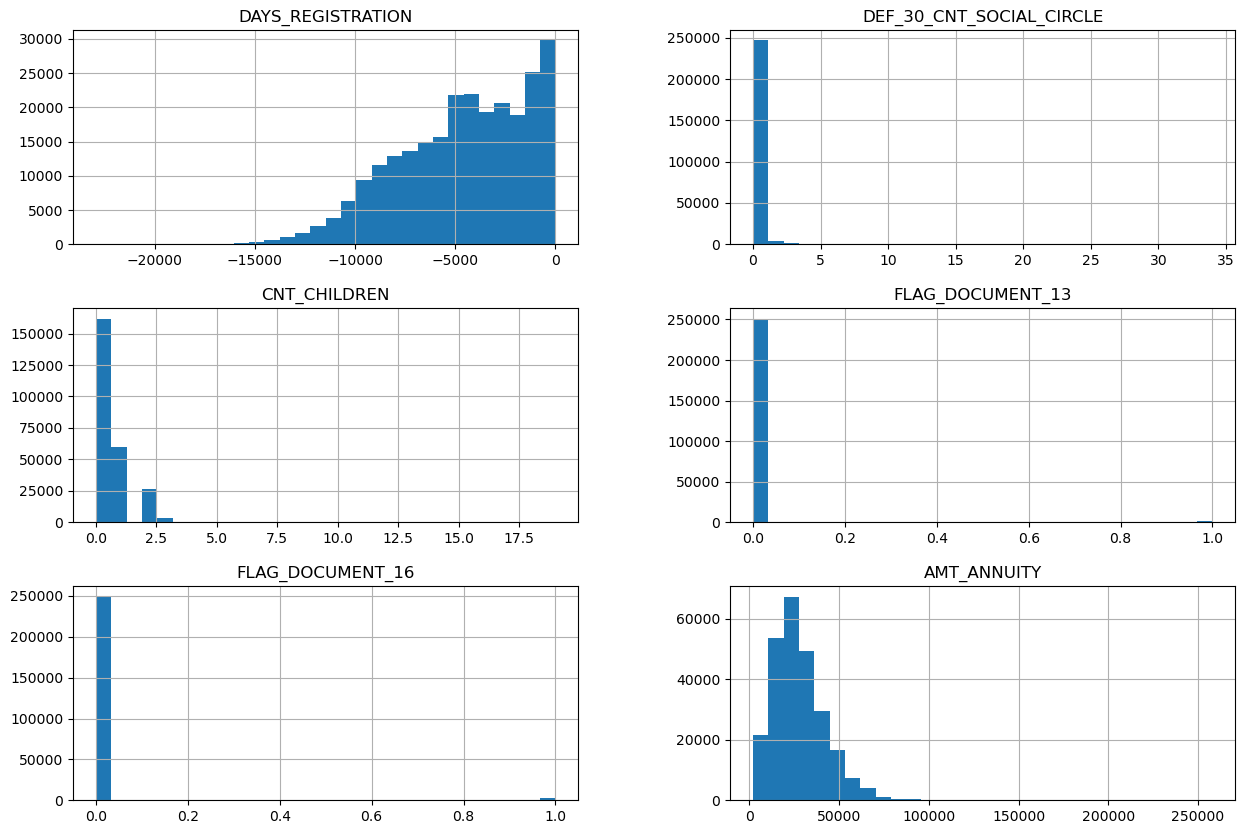

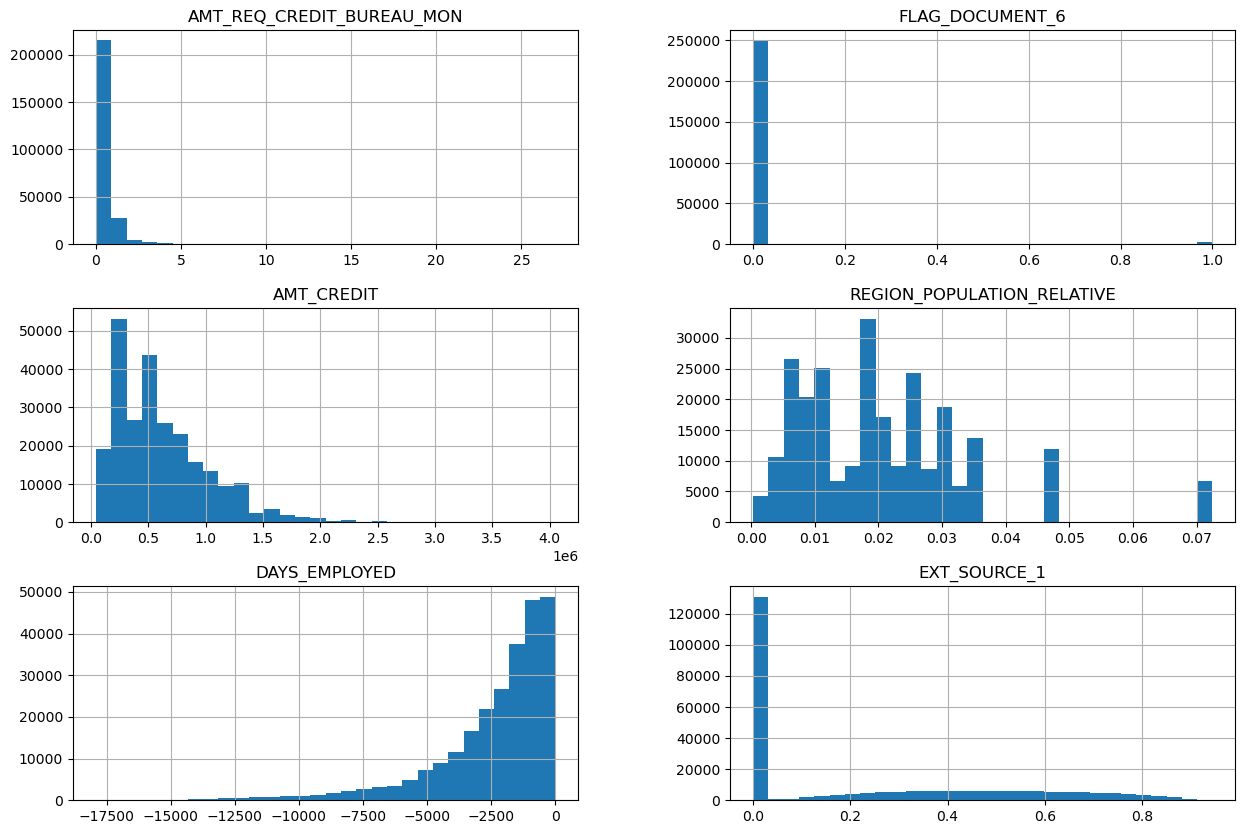

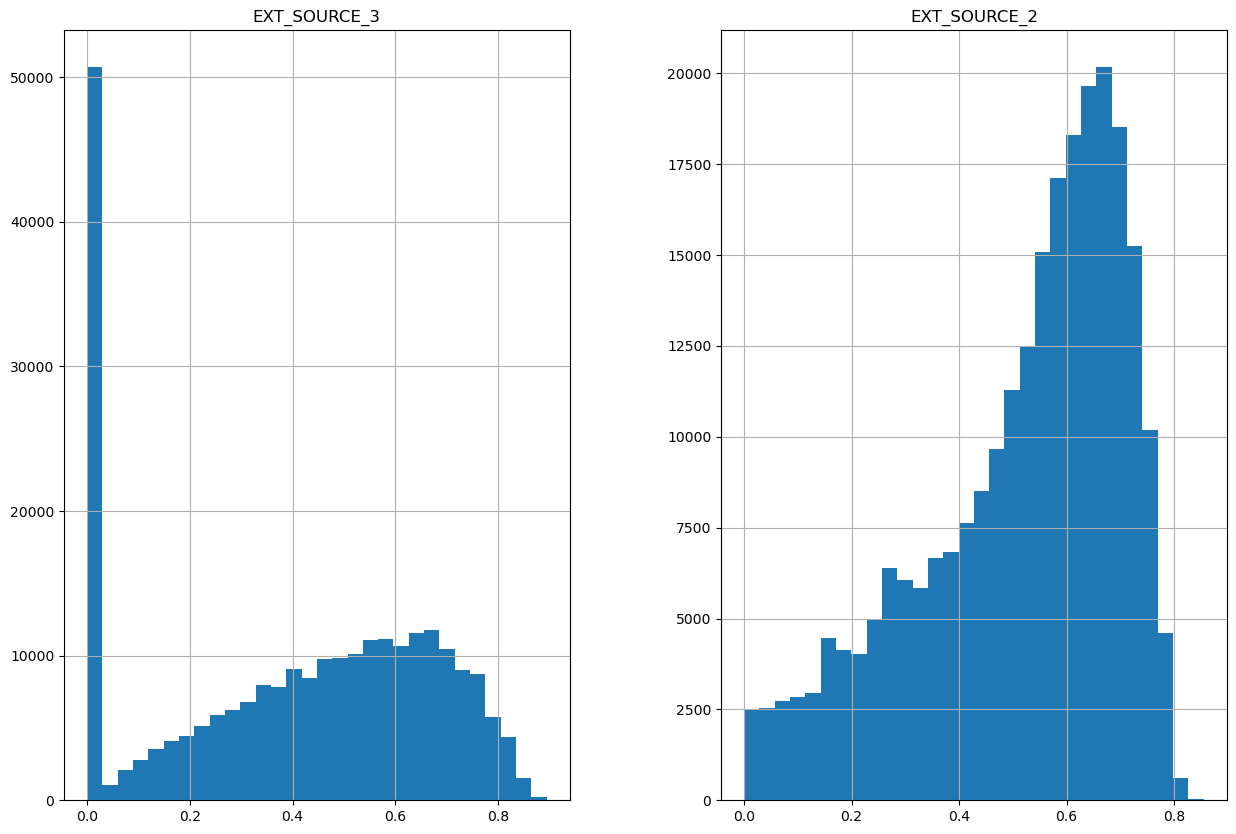

In [759]:
# Plot distribution on numerical columns
# Select numerical columns
num_cols = train_filtered.select_dtypes(include=['number']).columns

# Define batch size for better visualization
batch_size = 6  
num_batches = int(np.ceil(len(num_cols) / batch_size))

# Plot in smaller groups
for i in range(num_batches):
    batch_cols = num_cols[i * batch_size:(i + 1) * batch_size]
    train_filtered[batch_cols].hist(figsize=(15, 10), bins=30)
    plt.show()


The EXT_SOURCE_1, EXT_SOURCE_2 and EXT_SOURCE_3 have different distribution, with the EXT_SOURCE_1 has a large number of missing values. This information may be insightful when we dig deeper into its relationship with the TARGET variable.

Since the following features have low variations, we can remove them from our analysis:
- FLAG DOCUMENT 13
- FLAG DOCUMENT 16

In [761]:
# drop FLAG DOCUMENT 13 and 16
train_filtered = train_filtered.drop(columns=['FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_16'])

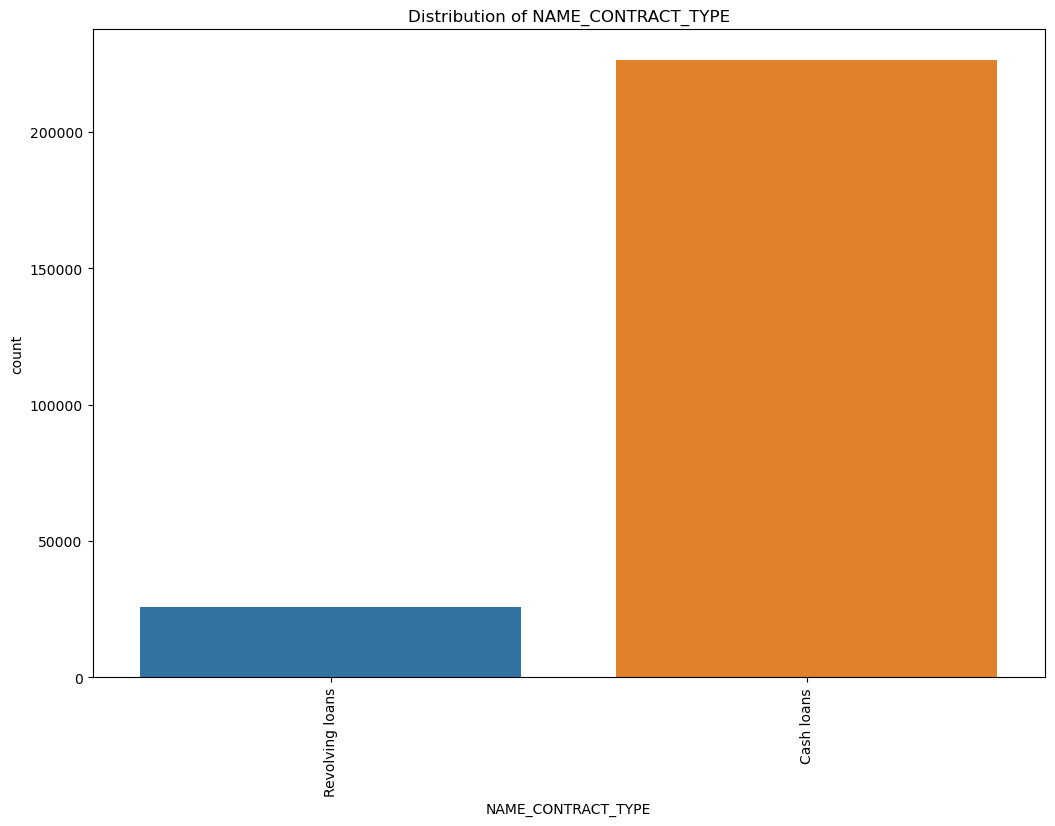

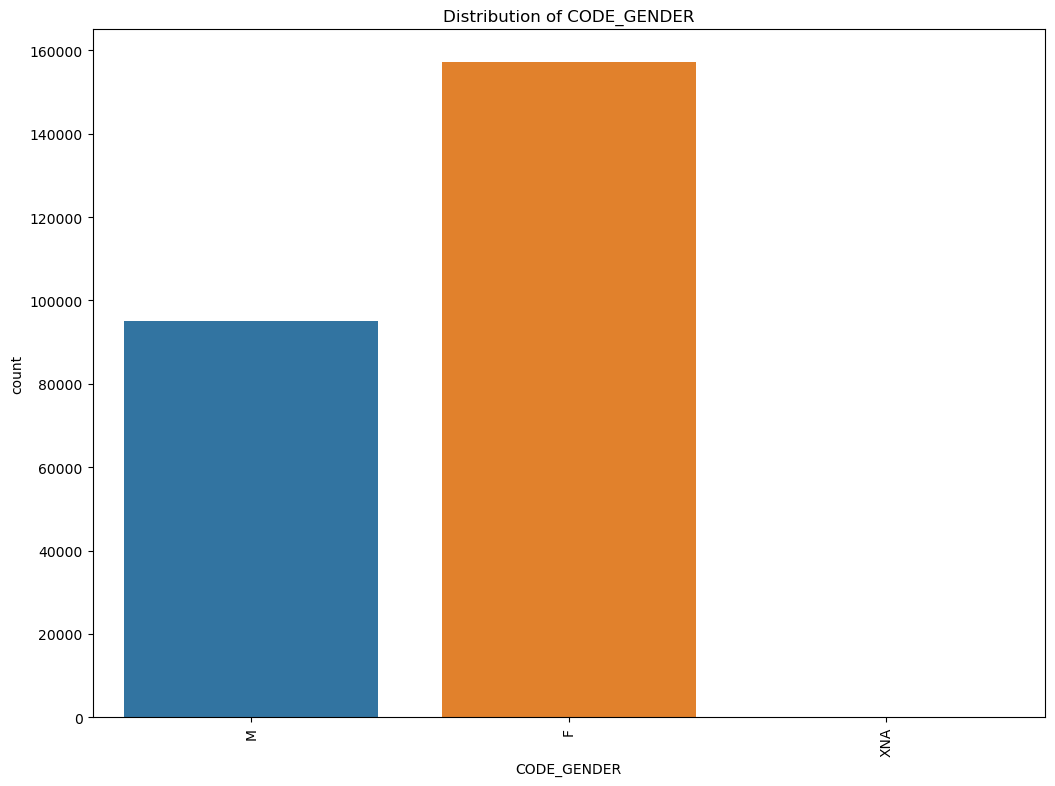

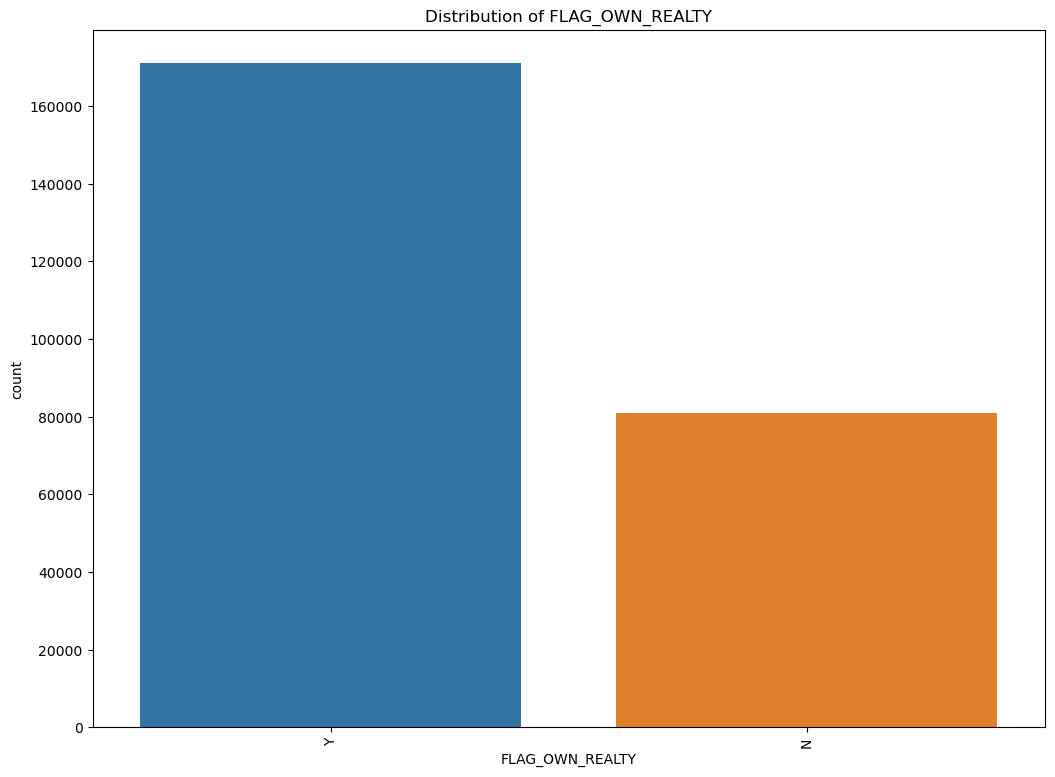

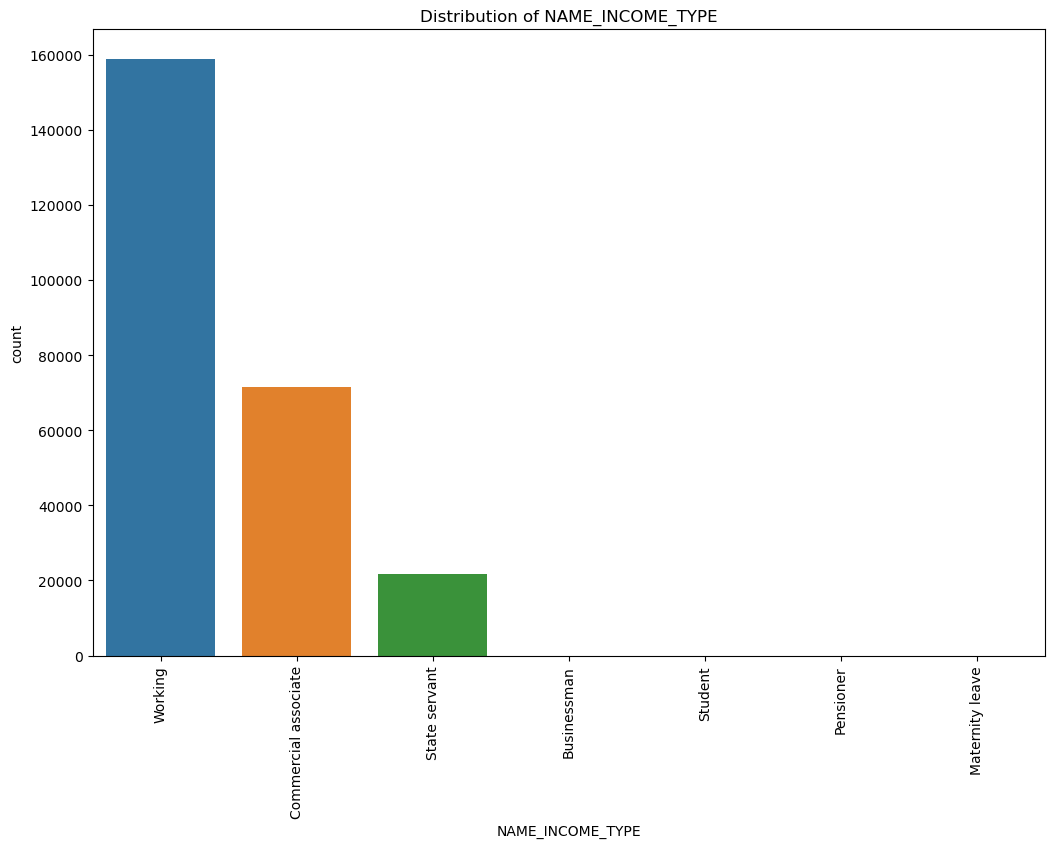

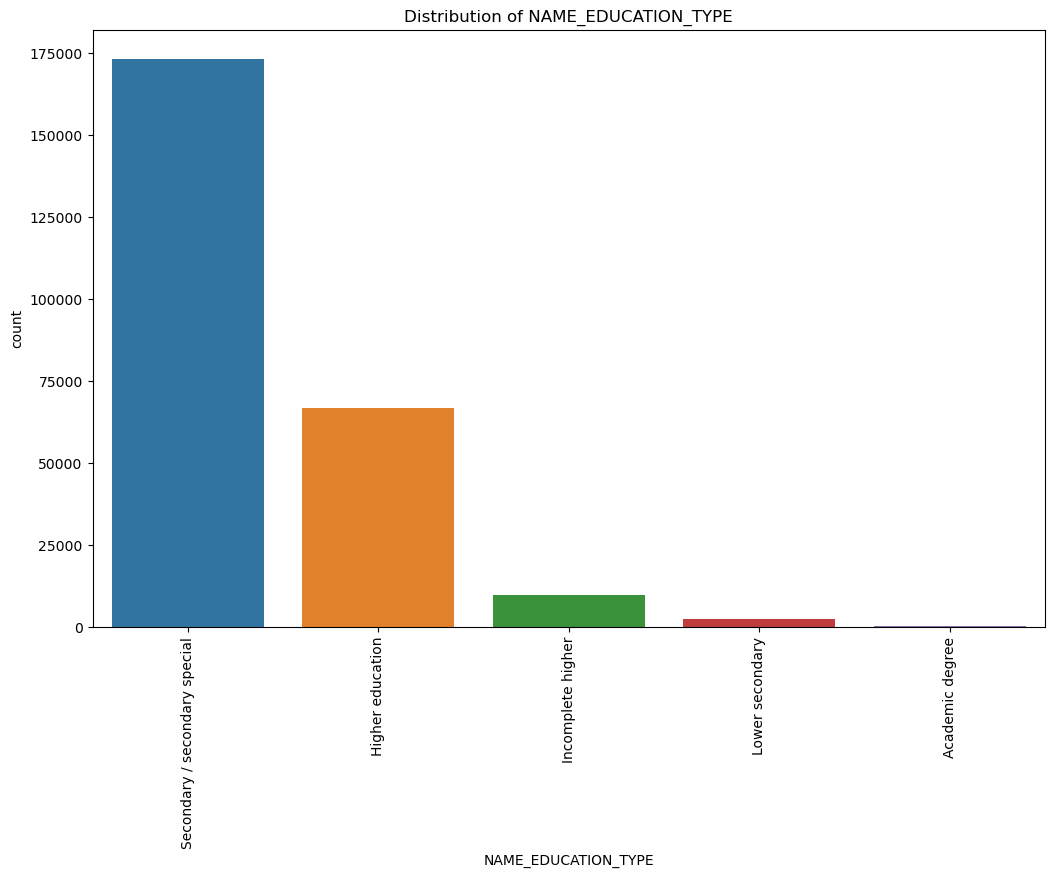

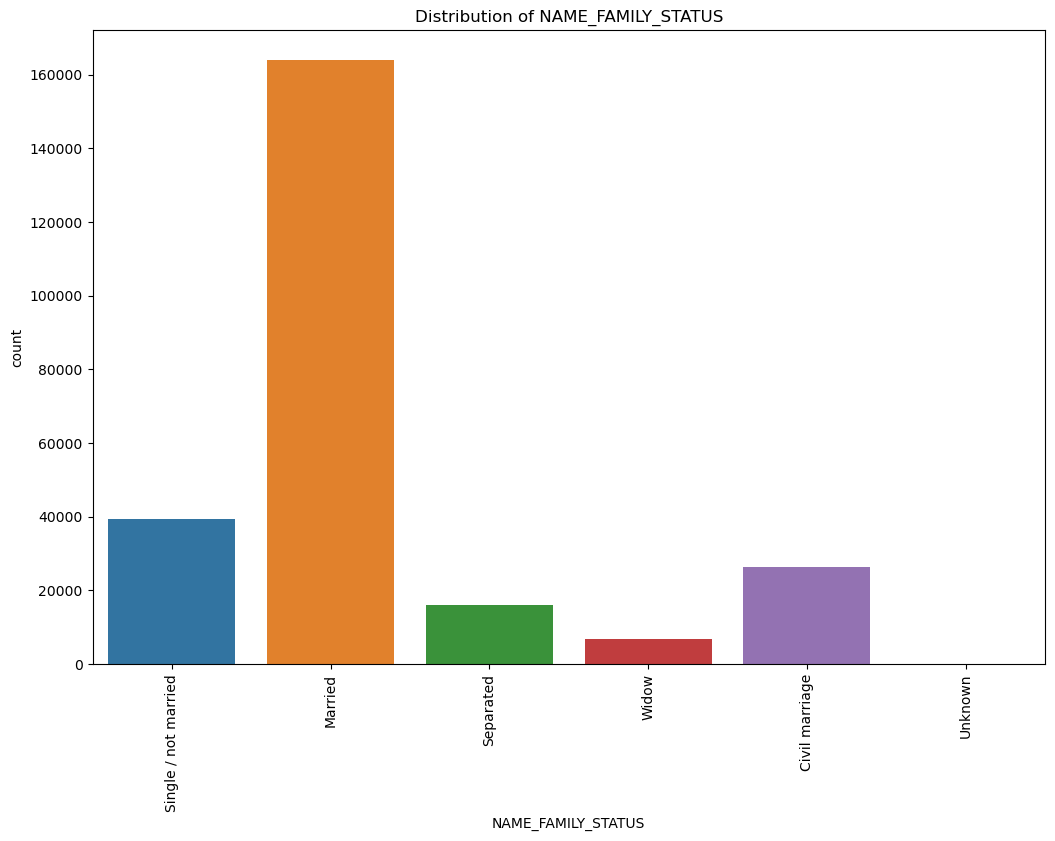

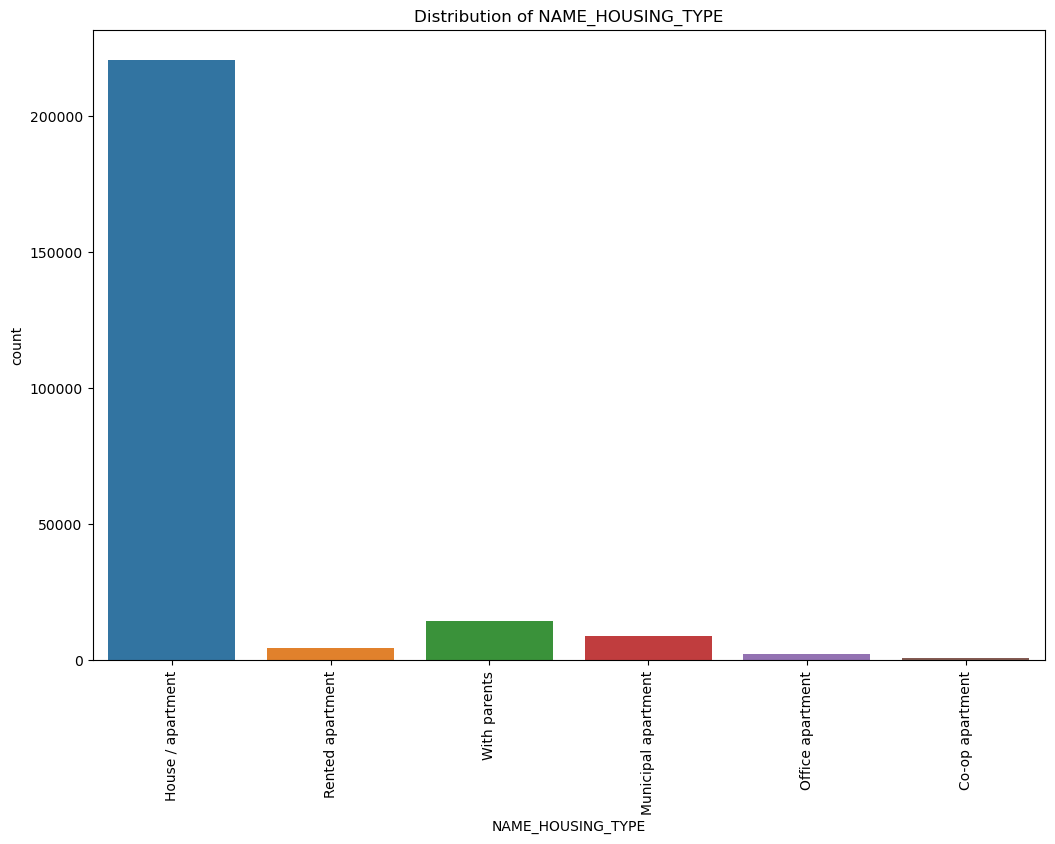

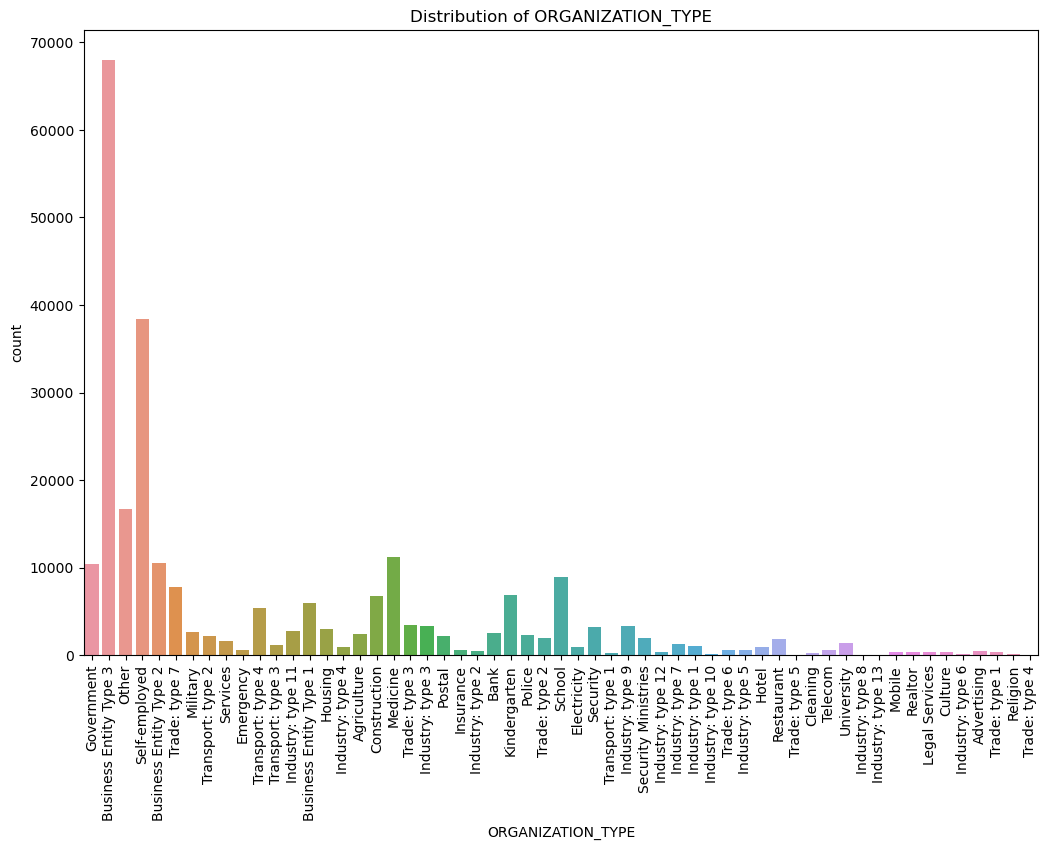

In [762]:
# Plot distribution on categorical columns
# Select categorical columns
cat_cols = train_filtered.select_dtypes(include=['object']).columns

# Define batch size for better visualization
batch_size = 1
num_batches = int(np.ceil(len(cat_cols) / batch_size))

# Plot in smaller groups
for i in range(num_batches):
    batch_cols = cat_cols[i * batch_size:(i + 1) * batch_size]
    
    # Plot each categorical column
    plt.figure(figsize=(30, 15))
    for j, col in enumerate(batch_cols, 1):
        plt.subplot(2, 3, j)  # Adjust rows and columns based on your batch size
        sns.countplot(data=train_filtered, x=col)
        plt.title(f'Distribution of {col}')
        plt.xticks(rotation=90)  # Rotate x-axis labels vertically
    
    plt.tight_layout()
    plt.show()


Most of applicants apply for cash loans and the largest type of housing is house/apartment. Interestingly, the number of people within business entity type 3 applying for loans amounts to nearly 70,000, far more than other type of organization.

**Bivariate analysis with TARGET**

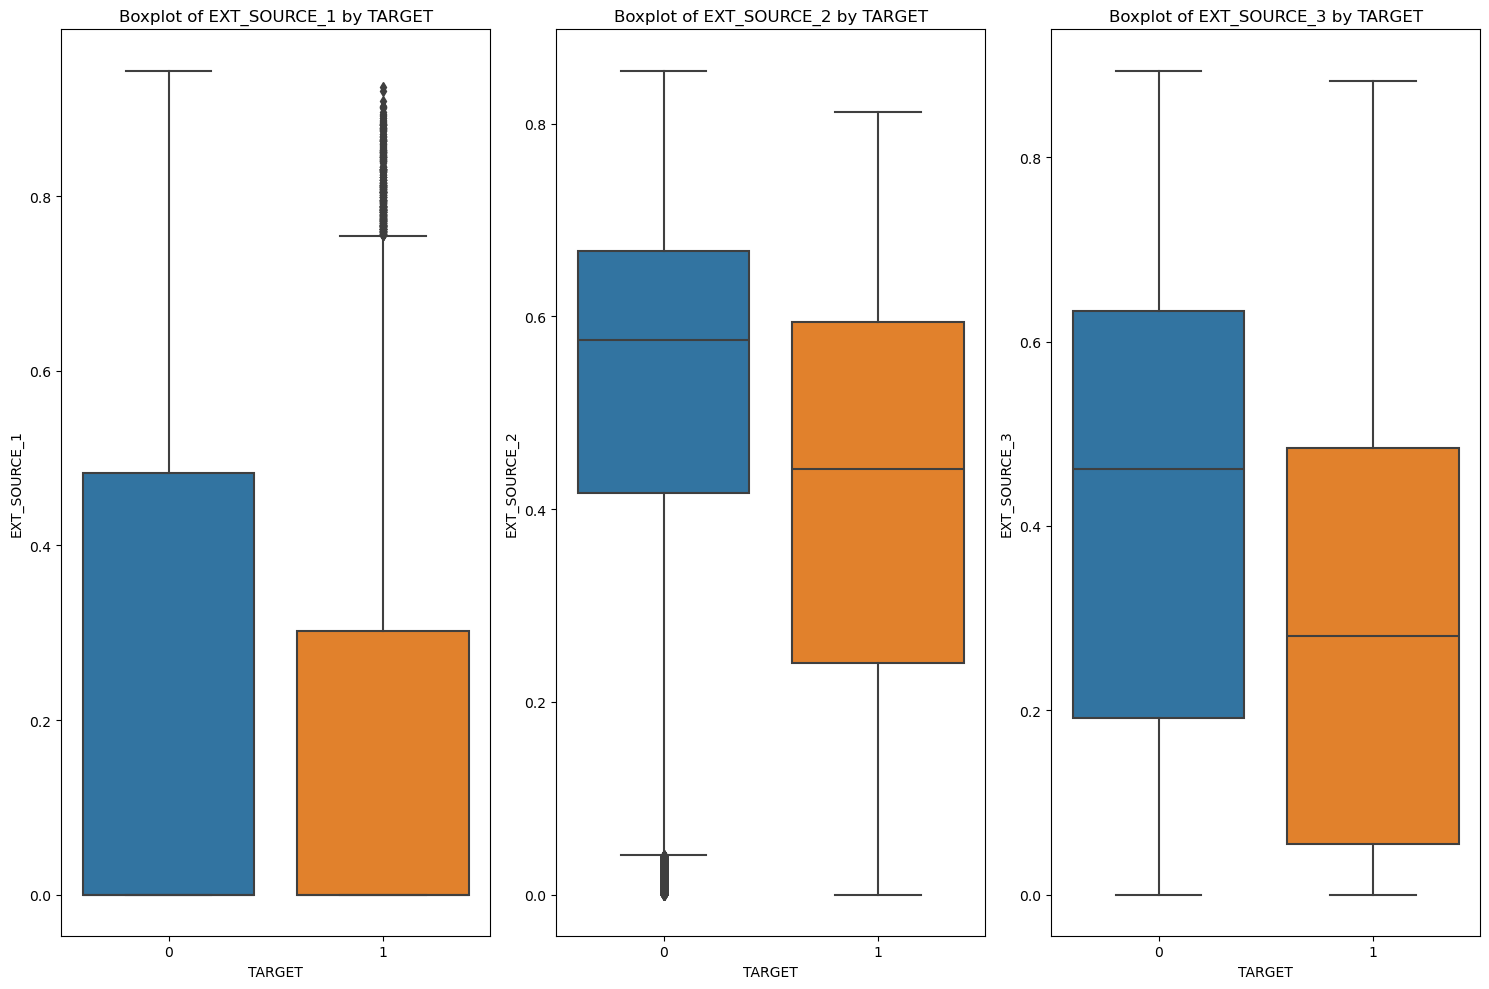

In [765]:
# Columns to analyze
ext_source_cols = ['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']

# Boxplot for each feature vs TARGET
plt.figure(figsize=(15, 10))
for i, col in enumerate(ext_source_cols, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(x='TARGET', y=col, data=train_filtered)
    plt.title(f'Boxplot of {col} by TARGET')
plt.tight_layout()
plt.show()

It can be clearly seen that the patterns of loan default are different among 3 EXT_SOURCE. 

In all 3 columns, the score for defaulters is lower for score for non-defaulters. The score of EXT_SOURCE_2 is much higher than that of EXT_SOURCE_3. This may due to different scoring method.

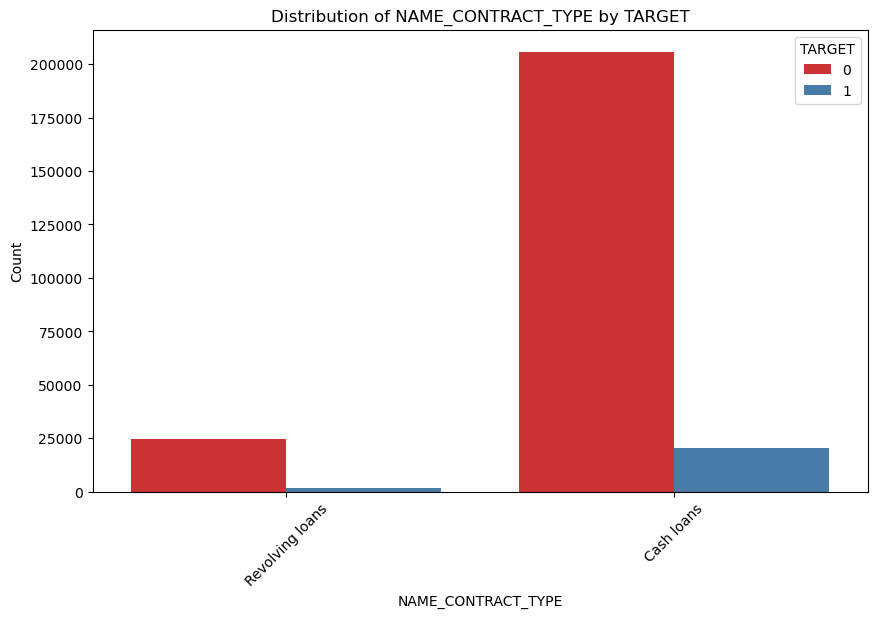

In [767]:
# Set up the figure size
plt.figure(figsize=(10, 6))

# Create a count plot for 'NAME_CONTRACT_TYPE' with the hue as 'TARGET' (0 or 1)
sns.countplot(data=train_filtered, x='NAME_CONTRACT_TYPE', hue='TARGET', palette='Set1')

# Add title and labels
plt.title('Distribution of NAME_CONTRACT_TYPE by TARGET')
plt.xlabel('NAME_CONTRACT_TYPE')
plt.ylabel('Count')

# Show the plot
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

The proportion of defaulters and non-defaulters in both revolving loans and cash loans is similar.

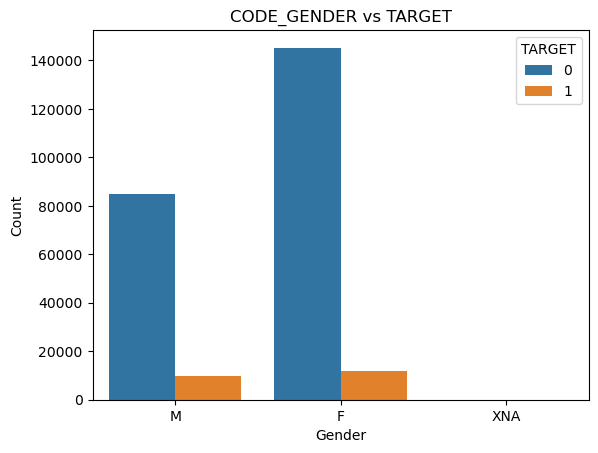

In [769]:
# Count plot for CODE_GENDER vs TARGET
sns.countplot(x='CODE_GENDER', hue='TARGET', data=train_filtered)
plt.title('CODE_GENDER vs TARGET')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()


Interestingly, male has a higher proportion of defaulting on loan than women

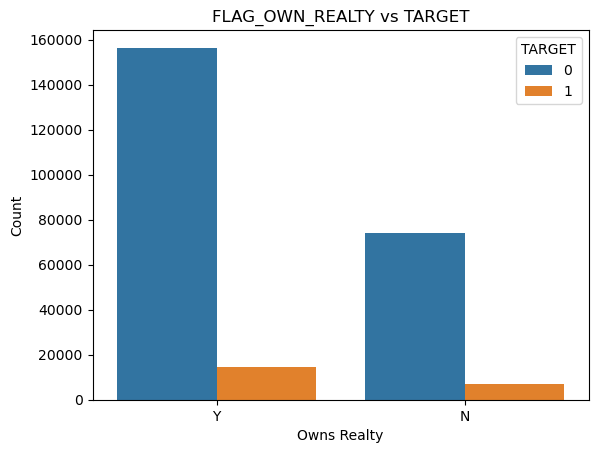

In [771]:
# Bar plot for FLAG_OWN_REALTY vs TARGET
sns.countplot(x='FLAG_OWN_REALTY', hue='TARGET', data=train_filtered)
plt.title('FLAG_OWN_REALTY vs TARGET')
plt.xlabel('Owns Realty')
plt.ylabel('Count')
plt.show()


The proportion of defaulters and non-defaulters of those owning or not owning real estate is similar.

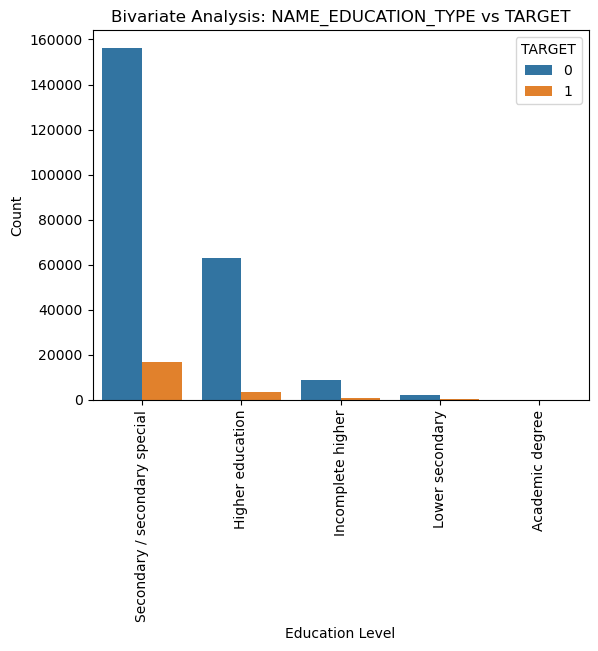

In [773]:
# Bar plot for NAME_EDUCATION_TYPE vs TARGET
sns.countplot(x='NAME_EDUCATION_TYPE', hue='TARGET', data=train_filtered)
plt.title('Bivariate Analysis: NAME_EDUCATION_TYPE vs TARGET')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()


The proportion of defaulters and non-defaulters of all education level is similar.

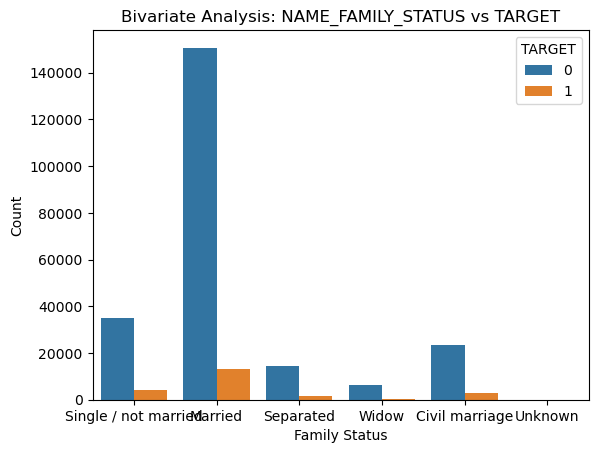

In [775]:
# Count plot for NAME_FAMILY_STATUS vs TARGET
sns.countplot(x='NAME_FAMILY_STATUS', hue='TARGET', data=train_filtered)
plt.title('Bivariate Analysis: NAME_FAMILY_STATUS vs TARGET')
plt.xlabel('Family Status')
plt.ylabel('Count')
plt.show()


A majority of applicants are married. Still, the proportion of defaulters and non-defaulters is similar across categories.

**Bivariate analysis in relation to TARGET**

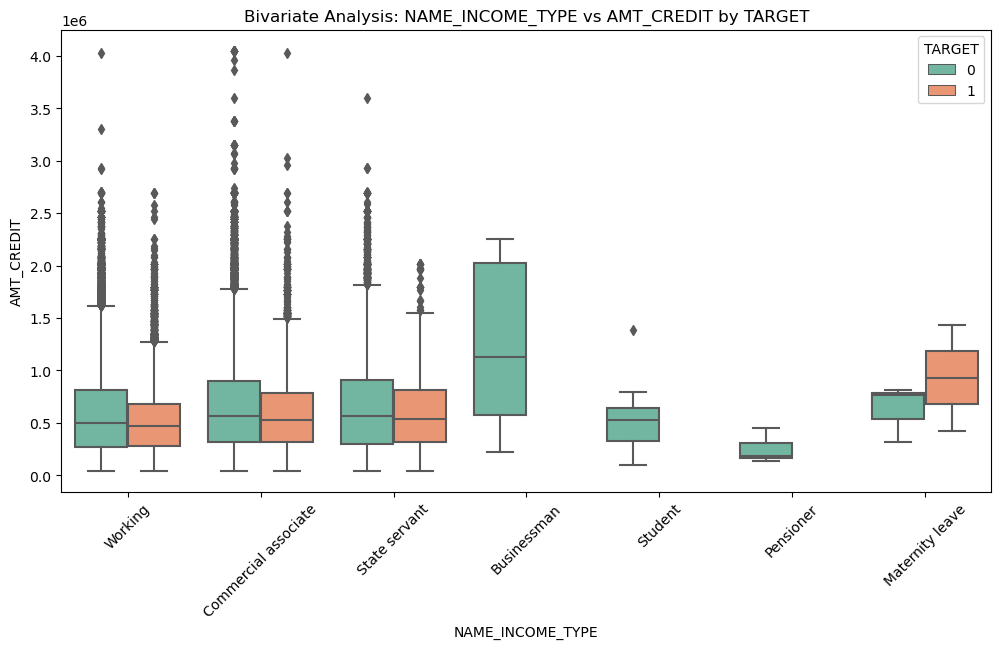

In [778]:
# Set up the figure size
plt.figure(figsize=(12, 6))

# Create a box plot with 'TARGET' as hue to separate the data
sns.boxplot(data=train_filtered, x='NAME_INCOME_TYPE', y='AMT_CREDIT', hue='TARGET', palette='Set2')

# Add title and labels
plt.title('Bivariate Analysis: NAME_INCOME_TYPE vs AMT_CREDIT by TARGET')
plt.xlabel('NAME_INCOME_TYPE')
plt.ylabel('AMT_CREDIT')

# Show the plot
plt.xticks(rotation=45) 
plt.show()


As seen in the chart above, there is no defaulters in businessman, student, pensioner. But the number of observations for these categories (<50) are not significant enough to conclude anything. However, businessman has the highest credit amount of loan. This is probably due to the characteristics of their job. In the meantime, other applicants have similar amount of loan.

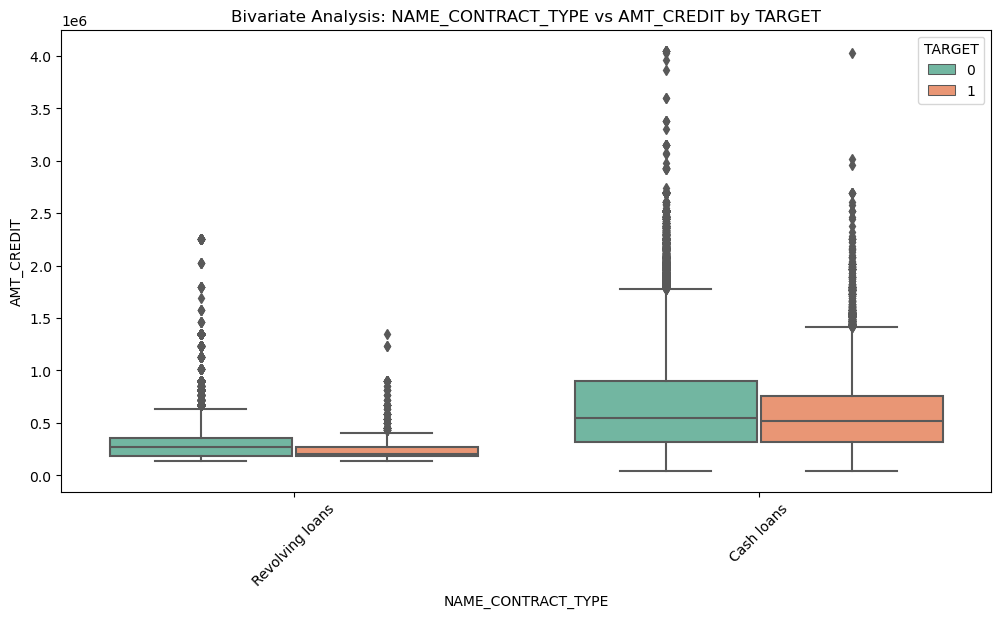

In [780]:
# Set up the figure size
plt.figure(figsize=(12, 6))

# Create a box plot with 'TARGET' as hue to separate the data
sns.boxplot(data=train_filtered, x='NAME_CONTRACT_TYPE', y='AMT_CREDIT', hue='TARGET', palette='Set2')

# Add title and labels
plt.title('Bivariate Analysis: NAME_CONTRACT_TYPE vs AMT_CREDIT by TARGET')
plt.xlabel('NAME_CONTRACT_TYPE')
plt.ylabel('AMT_CREDIT')

# Show the plot
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


The credit amount of loan for cash loans is much higher than revolving loans. Also, the non-defaulters usually borrow more than the defaulters.

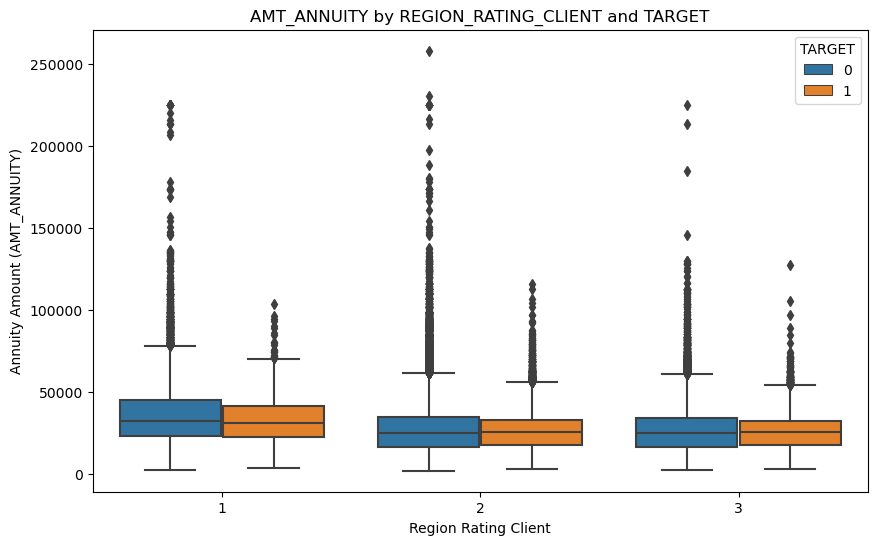

In [782]:
# Set the figure size
plt.figure(figsize=(10, 6))

# Create the boxplot for AMT_ANNUITY based on REGION_RATING_CLIENT and TARGET
sns.boxplot(data=train_filtered, x='REGION_RATING_CLIENT', y='AMT_ANNUITY', hue='TARGET')

# Set the labels and title
plt.title('AMT_ANNUITY by REGION_RATING_CLIENT and TARGET')
plt.xlabel('Region Rating Client')
plt.ylabel('Annuity Amount (AMT_ANNUITY)')

# Display the plot
plt.show()

The loan annuity is generally higher in those region rating = 1. 

<a id="8"></a> 
## 3. Conclusion

The dataset in this analysis is highly skewed with 91.92% non-defaulters and 8.07% defaulters. This may lead to bias towards the majority class (non-defaulters). In other words, the model may perform poorly on predicting defaulters. On the other hand, it may also lead to overfitting in majority class, which means that it will perform well on the training dataset but poorly on the test set.

In addition, below are some key findings on how different predictors associate with loan default:
- Contract Type and Gender: A higher number of loans are taken in cash loans compared to revolving loans. Women took more loans than men, but men had a slightly better repayment capability (10% of men vs. 7% of women). The gender data entry "XNA" is inconclusive and should be removed.
- Car and Real Estate Ownership: Ownership of a car or real estate does not seem to have a significant impact on loan repayment capabilities, as repayment rates for owners and non-owners are similar.
- Children, Income, and Family Status: Applicants without children tend to take more loans. The income type of the applicants significantly affects their loan repayment status, with unemployed and students more likely to be deemed capable of repayment.
- Credit Amount and Goods Price: Most loans are for amounts below Rs. 10 lakhs. The age group of 35-45 years shows a higher likelihood of repaying loans, while younger applicants (under 30) and older applicants (over 65) show lower repayment capability.
- External Scores: 'Ext_Source_1', 'Ext_Source_2', and 'Ext_Source_3' are crucial features in distinguishing between defaulters and non-defaulters, especially 'Ext_Source_1', which has a large proportion of missing values.

We may consider eliminating those variables that does not have much impact on loan default such as information on car and real estate, 

From this analysis, we have a fundamental understanding of the dataset itself and how factors correlate with loan default. In the next step, we can standardize features, conduct feature engineering, model selection and choose appropriate evaluation metrics.